In [1]:
#Se instala la librería a utilizar durante todo el notebook.
using PyPlot

# Ejercicio 1

Resolver con Runge-Kutta orden 4 el sistema: \begin{align} \dot x &= y-y^3\ \dot y &= -x -y^2 \end{align}

Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
Calculen el jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen qúe tipo de punto fijo es el $\vec 0$.


In [2]:
#Se implementa nuevamente el método de Runge Kutta (presentado en la tarea 12).
function runge_kutta2(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        k1 = f(x,t);
        k2 = f(x+(h/2)*k1,t+(h/2));
        k3 = f(x+(h/2)*k2, t+(h/2));
        k4 = f(x+h*k3, t+h);
        x = x+(h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
     end
     return listx
end

runge_kutta2 (generic function with 1 method)

In [33]:
#Se define el sistema a resolver.
I(x,t)=[x[2]-x[2]^3,-x[1]-x[2]^2]

I (generic function with 1 method)

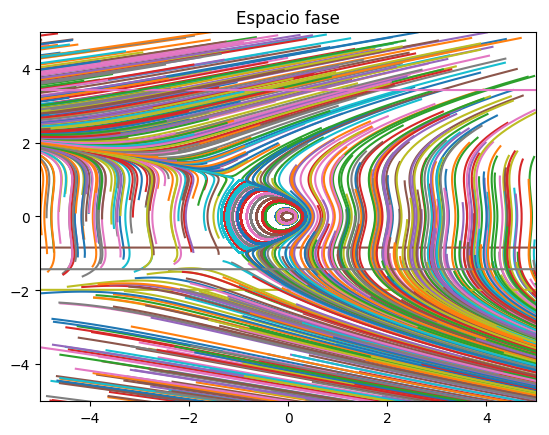

(-5,5)

In [31]:
#Se define el intervalo list en el cual se evaluará el método de Runge Kutta y la condición inicial. En RK0 se guardará el método evaluado en la función antes definida, list, y finalmente en la condición inicial. Se implementa un for para generar condiciones iniciales aleatorias.
list=0:0.01:200
for i in 1:800
CI=0.01*rand(-500:500,2,1)
RK0=runge_kutta2(I,list,CI)
   plot(map(I->I[1],RK0),map(I->I[2],RK0))
    title("Espacio fase")
end
axes()[:set_xlim]([-5,5])
axes()[:set_ylim]([-5,5])

Lo que haremos a continuación será calcular el jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$

Construimos la matriz Jacobiana, de la siguiente manera:
$J=\left(\begin{array}{cc} 
 \frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
 \frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
 \end{array} \right)$
 
 Donde:
 
 $ \frac{\partial f_1}{\partial x}=0$
 
  $ \frac{\partial f_1}{\partial y}=1-3y^2$
  
  $ \frac{\partial f_2}{\partial x}=-1$
  
  $ \frac{\partial f_2}{\partial y}=-2y$
  
  Por lo tanto:
  
$J= \left(\begin{array}{cc} 
 0  &   1-3y^2 \\
 -1 & -2y
 \end{array} \right)$

Ahora, evaluando en $\vec 0$, tenemos:

$J = \left(\begin{array}{cc} 
 0 & 1 \\
 -1 & 0
 \end{array} \right)$
 
 
Finalmente, basta recordar que  $\tau=\text{tr} J = 0$ y $\Delta= \det J = 1$. De esta manera, es posible concluir que $\vec 0$ es un punto central.

# Ejercicio 2

Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol: $${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$

    Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?
    
   Usen $\mu=0.5$.
Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.


In [29]:
#Se repite el proceso para la ecuación que rige el comportamiento de un oscilador de Van der Pol.
function V(x,t)
    return [x[2],0.5*(1-(x[1])^2)*x[2]-x[1]]
end

V (generic function with 1 method)

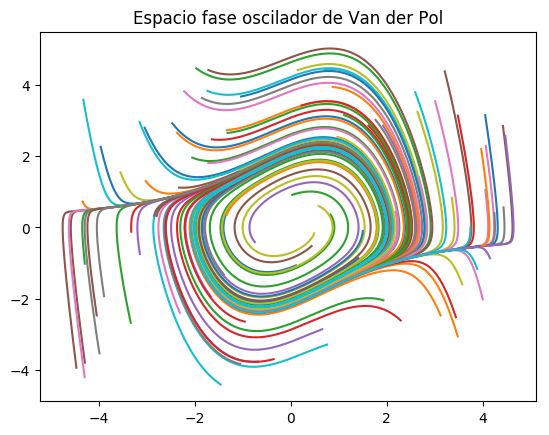

In [30]:
list=0:0.01:100
for i in 1:100
CI=rand(2,1)*9-4.5
RK2=runge_kutta2(V,list,CI)
   plot(map(V->V[1],RK2),map(V->V[2],RK2))
    title("Espacio fase oscilador de Van der Pol")
end

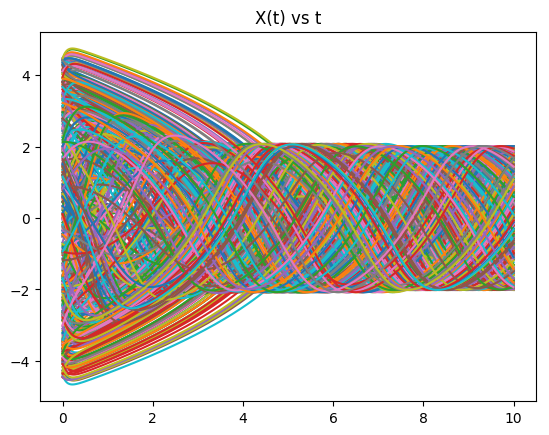

In [40]:
list=0:0.01:10
for i in 1:500
CI=rand(2,1)*9-4.5
RK2=runge_kutta2(V,list,CI)
   X1=map(V->V[1],RK2)
    X2=map(V->V[2],RK2)
    plot(list,X1);
    title("X(t) vs t")
end

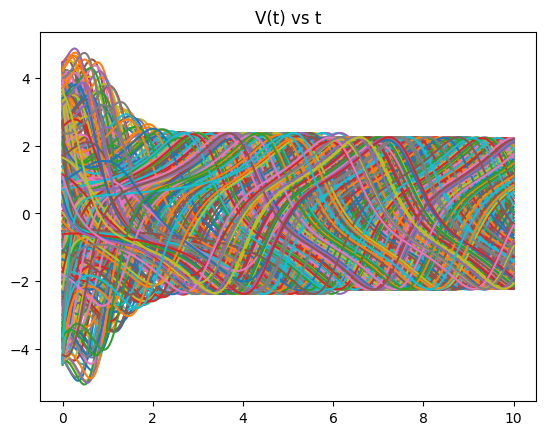

In [41]:
list=0:0.01:10
for i in 1:500
CI=rand(2,1)*9-4.5
RK2=runge_kutta2(V,list,CI)
   X1=map(V->V[1],RK2)
    X2=map(V->V[2],RK2)
    plot(list,X2);
    title("V(t) vs t")
end

# Ejercicio 3

Hacer lo mismo para el sistema: \begin{align} \dot x&= x+y-x (x^2+y^2)\ \dot y &= y-x-y(x^2+y^2) \end{align} Y comprobar numéricamente que hay un repulsor en $(0,0)$ y un ciclo límite (conjunto atractor) en $x^2+y^2=1$, para cotejar con lo que vimos en clase.

In [3]:
#Se define el sistema a resolver.
T(x,t)=[x[1]+x[2]-x[1]*(x[1]^2+x[2]^2),-(x[1]-x[2])-x[2]*(x[1]^2+x[2]^2)];

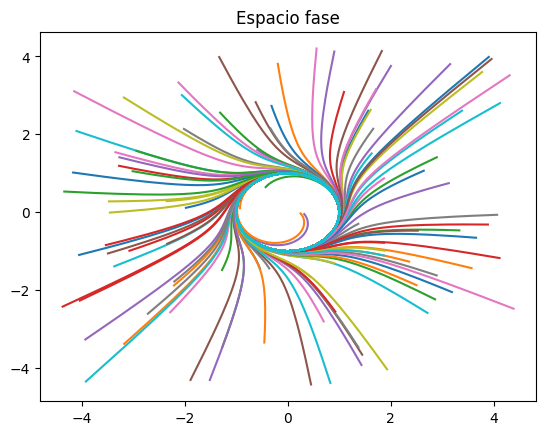

In [4]:
list=0:0.01:100
for i in 1:100
CI=rand(2,1)*9-4.5
RK3=runge_kutta2(T,list,CI)
   plot(map(T->T[1],RK3),map(T->T[2],RK3))
    title("Espacio fase")
end

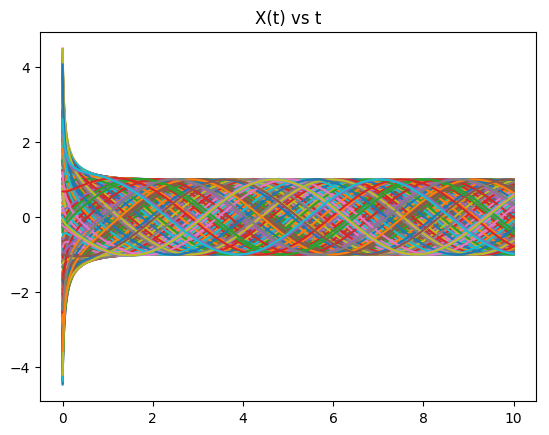

In [5]:
list=0:0.01:10
for i in 1:500
CI=rand(2,1)*9-4.5
RK3=runge_kutta2(T,list,CI)
   X1=map(T->T[1],RK3)
    X2=map(T->T[2],RK3)
    plot(list,X1);
    title("X(t) vs t")
end

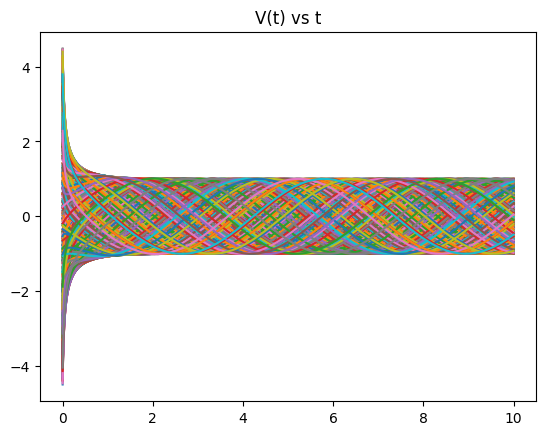

In [6]:
list=0:0.01:10
for i in 1:500
CI=rand(2,1)*9-4.5
RK3=runge_kutta2(T,list,CI)
   X1=map(T->T[1],RK3)
    X2=map(T->T[2],RK3)
    plot(list,X2);
    title("V(t) vs t")
end

Para hacer la comprobación numérica, hacemos un análisis análogo al del ejercicio 1.
Construimos la matriz Jacobiana, de la siguiente manera:
$J=\left(\begin{array}{cc} 
 \frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
 \frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
 \end{array} \right)$
 
 Donde:
 
 $ \frac{\partial f_1}{\partial x}=1-3x^2-y^2$
 
  $ \frac{\partial f_1}{\partial y}=-2xy+1$
  
  $ \frac{\partial f_2}{\partial x}=-2yx-1$
  
  $ \frac{\partial f_2}{\partial y}=1-3y^2-x^2$
  
  Por lo tanto:
  
$J= \left(\begin{array}{cc} 
 1-3x^2-y^2  &   -2xy+1 \\
 -2yx-1 & 1-3y^2-x^2
 \end{array} \right)$

Ahora, evaluando en $\vec 0$, tenemos:

$J = \left(\begin{array}{cc} 
 1 & 1 \\
 -1 & 1
 \end{array} \right)$
 
 
Finalmente, basta recordar que  $\tau=\text{tr} J = 2$ y $\Delta= \det J = 2$. De esta manera, es posible concluir que $\vec 0$ es un punto repulsor (espiral inestable).

Para la condición $x^2+y^2=1$:

$\tau=\text{tr} J = 0$ y $\Delta= \det J = 1$. De aquí se concluye que $x^2+y^2=1$ es un conjunto atractor.


